In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [3]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [4]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [5]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [6]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


# What if our features are with different variance 


* <b>We will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells we can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Observation 1</b>:

    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Observation 2</b>:

    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

In [7]:
#X=data[['f1','f2','f3']].values
#Y=data['y'].values
#print(X.shape)
#print(Y.shape)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

[  8573.43230008 -17958.0136002    9947.48296241]


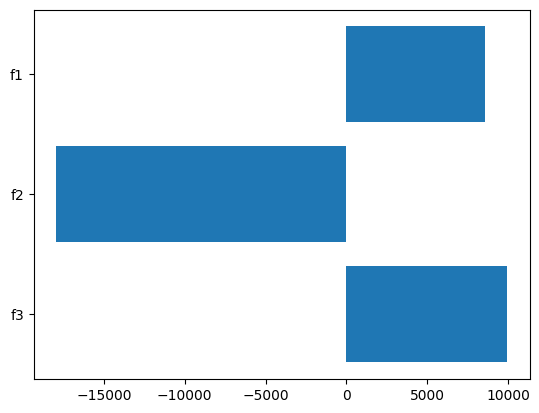

In [9]:
def plot_coefficients(coef, names):
    names, coef = zip(*sorted(list(zip(names, coef))))

    plt.barh(range(len(names)), coef[::-1][0:len(names)], align='center')
    plt.yticks(range(len(names)), names[::-1][0:len(names)])
    plt.show()

sgd_lr = SGDClassifier(loss="log_loss", random_state=42)
sgd_lr.fit(X_train, y_train)

print(sgd_lr.coef_[0])
plot_coefficients(sgd_lr.coef_[0], ['f1','f2','f3'])

In [10]:
sgd_lr.score(X_test, y_test)

0.625

[ 8413.9910035  -9960.50646683  7679.73503022]


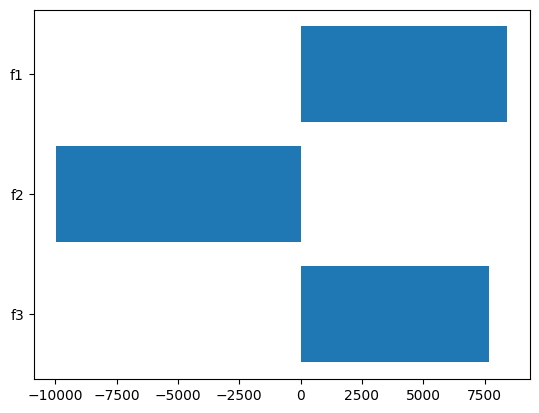

In [11]:
def plot_coefficients(coef, names):
    names, coef = zip(*sorted(list(zip(names, coef))))

    plt.barh(range(len(names)), coef[::-1][0:len(names)], align='center')
    plt.yticks(range(len(names)), names[::-1][0:len(names)])
    plt.show()

sgd_svm = SGDClassifier(loss="hinge", random_state=42)
sgd_svm.fit(X_train, y_train)

print(sgd_svm.coef_[0])
plot_coefficients(sgd_svm.coef_[0], ['f1','f2','f3'])

In [12]:
sgd_svm.score(X_test, y_test)

0.625

## Observation

1. There is no difference in accuracy of any of two models if we remove feature 'f1' and 'f2' from the dataset. so, 'f1' and 'f2' is not at all important.
2. If we remove 'f3', there is considerable amount of decrease in accuracy. 
3. Feature 'f3' is most important feature.

## After Standardization

In [13]:
#X=data[['f1', 'f2', 'f3']].values
#Y=data['y'].values
#print(X.shape)
#print(Y.shape)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [15]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

[-2.84169677  0.8340074  14.18039575]


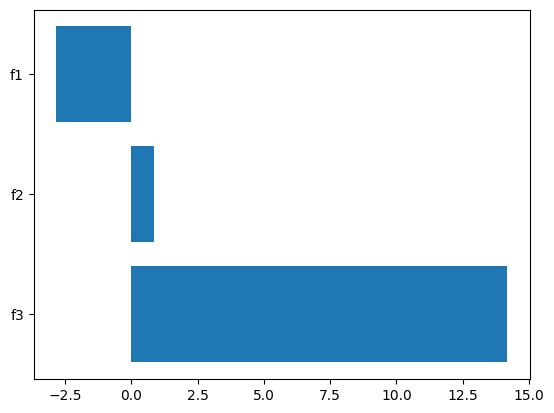

In [16]:
def plot_coefficients(coef, names):
    names, coef = zip(*sorted(list(zip(names, coef))))

    plt.barh(range(len(names)), coef[::-1][0:len(names)], align='center')
    plt.yticks(range(len(names)), names[::-1][0:len(names)])
    plt.show()


sgd_lr_s = SGDClassifier(loss="log_loss", random_state=42)
sgd_lr_s.fit(X_train, y_train)

print(sgd_lr_s.coef_[0])
plot_coefficients(sgd_lr_s.coef_[0], ['f1','f2','f3'])

In [17]:
sgd_lr_s.score(X_test, y_test)

0.925

[-3.45044948 -0.88509422 22.7254556 ]


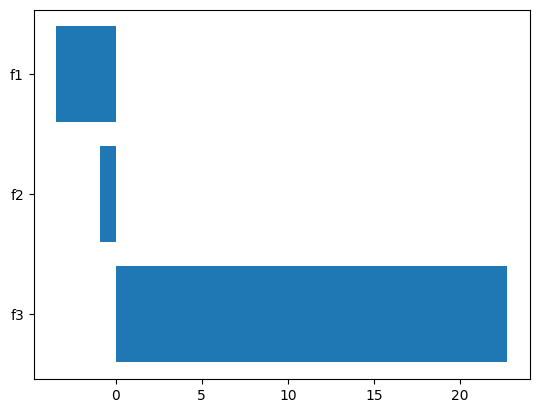

In [18]:
def plot_coefficients(coef, names):
    names, coef = zip(*sorted(list(zip(names, coef))))

    plt.barh(range(len(names)), coef[::-1][0:len(names)], align='center')
    plt.yticks(range(len(names)), names[::-1][0:len(names)])
    plt.show()


sgd_svm_s = SGDClassifier(loss="hinge", random_state=42)
sgd_svm_s.fit(X_train, y_train)

print(sgd_svm_s.coef_[0])
plot_coefficients(sgd_svm_s.coef_[0], ['f1','f2','f3'])

In [19]:
sgd_svm_s.score(X_test, y_test)

0.925

## Observation

1. Removing feature 'f1' increase SGDClassifier with log loss accuracy but there is no difference in SGDClassifier with hige loss model.
2. Removing feature 'f2' decrease SGDClassifier with log loss accuracy and SGDClassifier with hige loss model.
3. Removing feature 'f3' makes considerable decrease in both model accuracy.
4. Feature 'f3' is most important feature after standardization. 